# Příklad o limonádě (nebo čemkoli prodejném)
* Rozhodneš se míchat limonádu a prodávat ji na ulici.
* Otázka je, kolik si za ni říct, abys maximalizoval zisk?
* V ekonomii se často zmiňuje *poptávka*, která nám dává do souvislosti vztah mezi cenou produktu a poptávkou po něm.
* Začněme nejjednodušším případem, kdy křivka poptávky vypadá následovně:

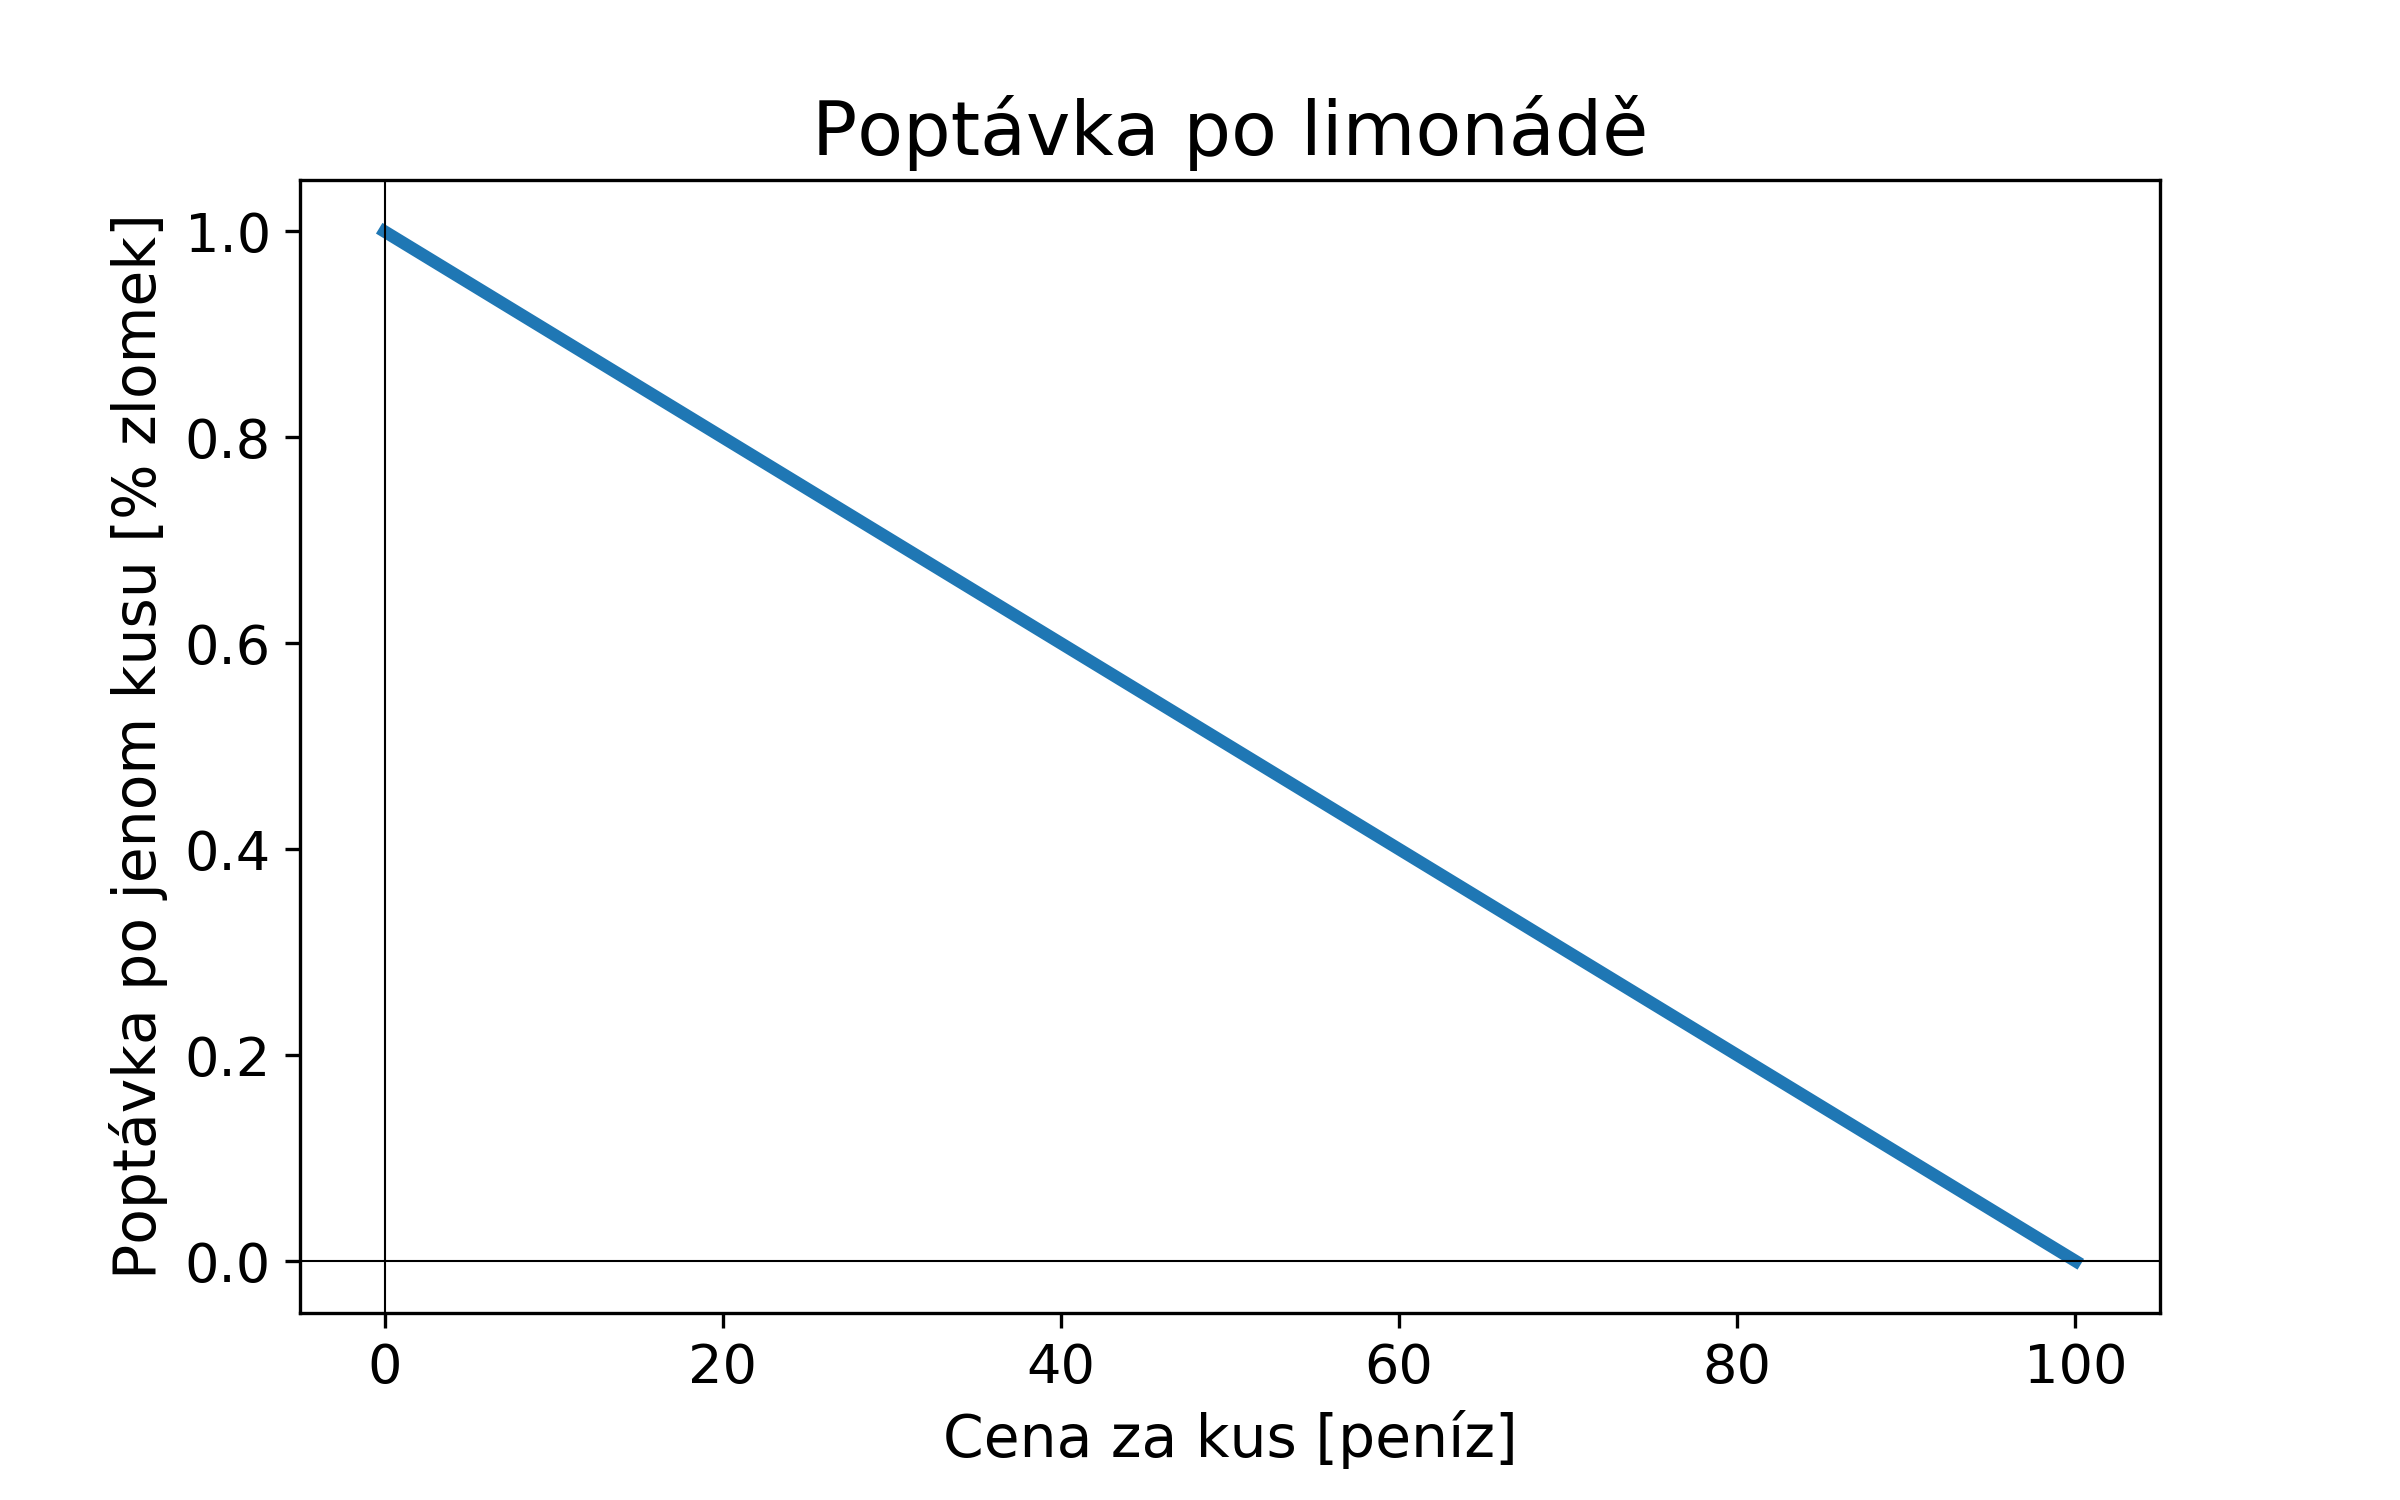

In [6]:
from IPython.display import Image

Image('../../resource/fig/poptavka_lim.png', retina=True)

* Význam je, že při navýšení ceny limonády (posun po ose x doprava), méně lidí si ji bude ochotno koupit. Poptávka se snižuje.
* Při ceně 100 si limonádu nekoupí už nikdo.
* Naopak zadarmo (cena=0) se zbavíš všech limonád.
* Vyrobit limonádu je celkem levné ale zadarmo to není, cena výroby bude 10 peněz.
* Počáteční investice do odšťavňovače citrónů je 1000 peněz.

## Otázka
* Jakou si zvolíš cenu limonády, abys měl co největší profit, řekněme ze 100 limonád?

---
---
# Pokud je toto tvůj první Jupyter Notebook:
* Buňka (cell) se provede kombinací Shift-Enter, musíš v ní mít ale kurzor.
* Po úspěšném proběhnutí buňky se objeví nalevo od ní "pořadové" číslo průběhu.
* Provedení buňky a vytvoření nové prázdné pod ní, použij Alt-Enter.
* Jakýkoli text za znakem # je komentář a Python ho ignoruje až do konce řádku.
* Pozor: Pokud proběhneš prázdnou buňku, která má pod sebou výstup jako nápovědu, nápověda ti zmizí, proto Alt-Enter.
---
---

In [4]:
# importuj staré dobré moduly
import numpy as np
import matplotlib.pyplot as plt

# pokročilý trik, který umožňuje měnit parametry vašich grafů pro celý sešit
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,6] # velikost grafu
mpl.rcParams['lines.linewidth'] = 3  # tloušťka čáry
mpl.rcParams['lines.markersize'] = 10  # velikokost bodů v grafu
mpl.rcParams['xtick.labelsize'] = 12  # velikost fontu popisků osových bodů x
mpl.rcParams['ytick.labelsize'] = 12 # velikost fontu popisků osových bodů y
mpl.rcParams['axes.labelsize'] = 'larger'  # velikost fontu názvu os

# odkomentováním příkazu vypíšete všechny nastavitelné vlastnosti
# svobodě Python meze rozhodně neklade:)
# mpl.rcParams.keys() 

In [5]:
# definuj osu ceny limonády
cena = np.linspace(0,100, 101)

In [6]:
# Jaká je rovnice naší poptávky (ve tvaru f_popt = a*cena + b) ze zadání?
# Pro výpočet a,b můžeš využít dvou bodů, které protínají osy x a y.
a = -1/100
b = 1

* Pozor, toto je pro jednu limonádu, a my si představíme, že pro malého živnostníka ve světě s 8 000 000 000 lidí prostě pro N limonád vynásobíme poptavku N-krát
* Jinými slovy, jsme malí páprdové, kteří nemůžou způsobit saturaci trhu s limonádou.

In [7]:
# Celkem tedy se poptávka po 100 limonádách rovná:
popt = 100*(a*cena + b)

### Poptávka nám říká jaký zlomek limonády se nám při dané ceně podaří prodat

In [8]:
# Tvůj příjem ze 100 vyrobených limonád tedy je?
prijem = cena*popt

In [9]:
# Jaké jsou tvé výdaje?
investice = 1000
vyroba = 100*10
vydaje = investice + vyroba

In [10]:
# Konečně čistý zisk
zisk = prijem - vydaje

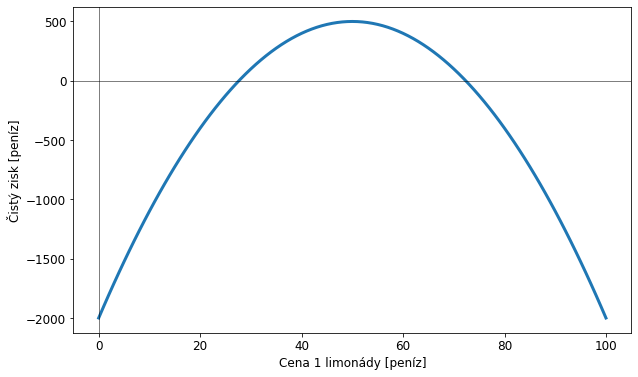

In [11]:
# čistý zisk vykreslime
plt.plot(cena, zisk, label='Zisk')
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Cena 1 limonády [peníz]')
plt.ylabel('Čistý zisk [peníz]')
plt.show()

---
* Dává to smysl. Nulová cena znamená, že všechny limonády rozdáme zadarmo a zahučíme investici 1000 a dalších 100 x 10 za výrobní náklady. Celkem tedy -2000.
* Maximální cena 100 znamená to samé, jen s výhodou, že nám všechny limonády zbydou a můžeme je aspoň vypít.
---

### Z osové symetrie paraboly je již vidět, že maximum musí nastat při ceně přesně v půli mezi 0 a 100, tedy cena=50.

In [12]:
# Kolik ale prodáme limonád při ceně 50?
# Zbylý zlomek limonád je 1-popt
1-(1-50/100)

0.5

## To je celkem překvapivé, protože vyděláme nejvíc, pokud nám polovina limonád zbyde.

---

#### Spočtěme si to ale přesně

* Můžeme postupovat stejně jako u příkladu s pizzou a vytvořit si funkci a využít fsolve()
* Funkce ale tentokrát musí pojmout mnoho vstupů, protože zisk je závislý na:
    (cena, investice, naklad_za_kus, pocet_kusu)
    
Zkuste si to sami, ukážem si alternativní postup, který prostě bude hledat maximum našeho pole hodnot zisku 

In [13]:
# Což je stejné jako hledat očima pokud si vypíšeme pole zisk
zisk

array([-2000., -1901., -1804., -1709., -1616., -1525., -1436., -1349.,
       -1264., -1181., -1100., -1021.,  -944.,  -869.,  -796.,  -725.,
        -656.,  -589.,  -524.,  -461.,  -400.,  -341.,  -284.,  -229.,
        -176.,  -125.,   -76.,   -29.,    16.,    59.,   100.,   139.,
         176.,   211.,   244.,   275.,   304.,   331.,   356.,   379.,
         400.,   419.,   436.,   451.,   464.,   475.,   484.,   491.,
         496.,   499.,   500.,   499.,   496.,   491.,   484.,   475.,
         464.,   451.,   436.,   419.,   400.,   379.,   356.,   331.,
         304.,   275.,   244.,   211.,   176.,   139.,   100.,    59.,
          16.,   -29.,   -76.,  -125.,  -176.,  -229.,  -284.,  -341.,
        -400.,  -461.,  -524.,  -589.,  -656.,  -725.,  -796.,  -869.,
        -944., -1021., -1100., -1181., -1264., -1349., -1436., -1525.,
       -1616., -1709., -1804., -1901., -2000.])

In [14]:
# K tomu použijte funkci max()
max(zisk)

500.0

In [15]:
# Abychom získali cenu, tj hodnotu x, která náleží zisku 500, použijte funkci np.argmax()
np.argmax(zisk)

50

!!! POZOR!!!
---
Toto je ošemetný výsledek, protože se zdá být dobře. ALE
* argmax nám vrací pozici (index), na kterém se nachází hodnota max zisku 500

In [16]:
# Takže musíme teď najít hodnotu pole *cena*, na indexu 50
cena[50]

50.0

In [17]:
# Najednou se obě operace dají spojit
cena[np.argmax(zisk)]

50.0

## Stejné, ale jen proto, že jsme si v prvním řádku vytvořili pole o 101 bodech rovnoměrně rozdělených mezi 0 a 100
* tedy na pozici 50, je cena 50, a to je náhoda.
* Při jakémkoli jiné definici pole *cena* by np.argmax() vydal špatnou hodnotu

In [18]:
# pro zajímavost
type(np.argmax(cena))  # toto je 'int', tedy přirozené číslo

numpy.int64

In [19]:
type(cena[50])  # toto je 'float', tedy reálné číslo

numpy.float64

!!! POZOR 2!!!
---
* fsolve() je lepší metodou, protože je řešení přesnějsí
* použitím max() jsme hledali maximum našeho pole, které jsme spočítali jen pro naše na začátku vybrané ceny
* tedy max() závisí na četnosti našich hodnot v *cena*, tzv. samplingu.

---
---
* Každý podnik prahne po znalosti křivky poptávky, protože optimalizuje vyděláváná peněz z jakéhokoli produktu.
* V praxi se tímto problémem zabývají výzkumy vašich útrat z minulosti, průzkumy zákaznických preferencí, a také třeba aukce. Ty všechny zkoumají vaši ochotu za něco platit (anglicky Willingness to pay, WTP), což je v podstatě křivka poptávky.

### Vezměme si jeden konkrétní příklad, kdy [Lusk and Schroeder dokázali změřit poptávku po amerických stejcích v roce 2004](https://onlinelibrary.wiley.com/doi/full/10.1111/j.0092-5853.2004.00592.x)

* Provedli dvě měření:
* Tázali se stejný soubor otázek ohledně preferencí stejků, jedna skupina si na konci musela na zakladě svých odpovědí svůj nejoblíbenější stejk koupit, narozdíl od druhé skupiny, která nemusela nakonec koupit nic.
* Tím se zohledňuje fakt, že lidé lehce řeknou, že by si něco koupili pokud si to nemusí koupit teď a tady
* Takže máme dvě skupiny, tu, která si nemusí koupit stejk označíme *_hyp* (hypotetická)
* Skupinu, která musí nakonec koupit stejk označíme *_non_hyp* (non-hypotetická)


### Digitalizoval jsem pro vás jejich grafy

In [20]:
# publikace má jen pár bodů
data_x = np.array([1/7*100, 2/7*100, 3/7*100, 4/7*100, 5/7*100, 6/7*100, 100])

# osa y
data_hyp = np.array([1, 0.91, 0.63, 0.26, 0.1, 0.05, 0])
data_non_hyp = np.array([0.9, 0.68, 0.4, 0.17, 0.08, 0.04, 0])

In [21]:
# proto jsem interpoloval hodnoty i mezi těmi původními
# Více o této metodě je zde https://numpy.org/doc/stable/reference/generated/numpy.interp.html
# Přesto, interpolace je pokročilým tématem na jindy
from scipy import interpolate

# Ve zkratce, hledáme hodnoty funkce mezi body, které jsme opravdu změřili
# Body, ve kteých chci znát hodnoty funkce jsou:
cena_new = np.linspace(1/7*100, 100, 201)

# interpolace pro obě skupiny
f_hyp = interpolate.interp1d(data_x, data_hyp, kind='cubic')
f_non_hyp = interpolate.interp1d(data_x, data_non_hyp, kind='cubic')

# poptávku získáme aplikací f_ na naši novou osu x, cena_new
popt_hyp = f_hyp(cena_new)
popt_non_hyp = f_non_hyp(cena_new)

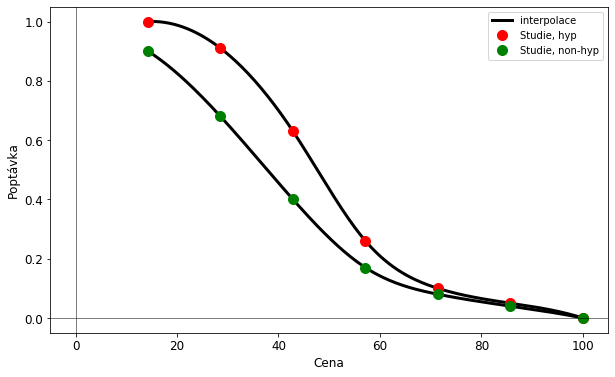

In [24]:
# vykreslete graf bodů ze studie (data_x, data_hyp) a
# a interpolovaná data, (cena_new, popt_new)
plt.plot(cena_new, popt_hyp, 'k', label='interpolace')
plt.plot(cena_new, popt_non_hyp, 'k', label='_nolegend_')
plt.plot(data_x, data_hyp, 'ro', label='Studie, hyp')
plt.plot(data_x, data_non_hyp, 'go', label='Studie, non-hyp')

plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Cena')
plt.ylabel('Poptávka')
plt.legend()
plt.show()

### To zjevě funguje, a také dává smysl:
* Při nízké ceně se poptávka zplošťuje, každý, kdo má chuť na steak si ho při tak malé ceně dá
* A jistě jsou všude lidé, kteří na cenu steaku ani nemusí hledět a koupí si ho skoro bez ohledu na cenu, to je ten pozvolný pokles k nule poptávky.

---

## Pokud uvážíme stejné křivky pro naši limonádu, vyděláme teď více či méně než původně?
* Postup zůstane stejný, jen musíme vše počítat s novou osou x, *cena_new*
* Technicky v poptávce nevystupuje cena jako taková, takže se již nejedná o kvadratickou rovnici.
* Tím, že naše nová poptávka není žádnou známou funkcí, na papíře bychom ji těžko řešili
* S Pythonem to uděláme úplně stejně jako předtím

In [25]:
# popt_new po 100 limonádách
popt_hyp_100 = popt_hyp*100
popt_non_hyp_100 = popt_non_hyp*100

In [26]:
# zisk stejně jako původně
prijem_hyp = cena_new*popt_hyp_100
prijem_non_hyp = cena_new*popt_non_hyp_100

In [27]:
# výdaje se nemění

In [28]:
# zisk
zisk_hyp = prijem_hyp - vydaje
zisk_non_hyp = prijem_non_hyp - vydaje

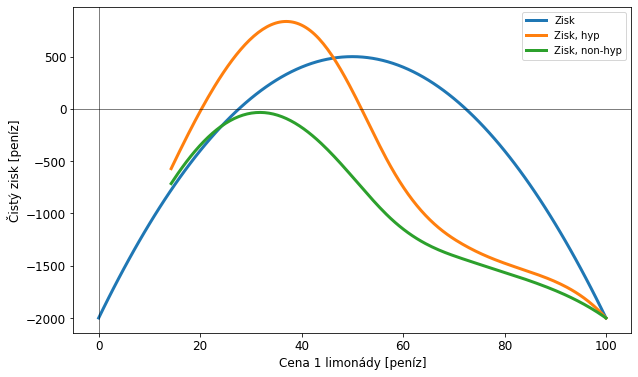

In [29]:
# Teď si můžeš původní a nové zisky vykreslit pro porovnání
plt.plot(cena, zisk, label='Zisk')
plt.plot(cena_new, zisk_hyp, label='Zisk, hyp')
plt.plot(cena_new, zisk_non_hyp, label='Zisk, non-hyp')
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Cena 1 limonády [peníz]')
plt.ylabel('Čistý zisk [peníz]')
plt.legend()
plt.show()

## Funkce zisku již není kvadratickou funkcí
* Nicméně, stále můžeme najít cenu limonády, při které budeme mít maximální zisk.

In [30]:
# použití print k vypsání optimálního profitu a při jaké ceně to je
print(f'Maximální zisk pro skupinu hyp je {round(np.max(zisk_hyp))} \
při ceně 1 limonády {cena_new[np.argmax(zisk_hyp)]}')

Maximální zisk pro skupinu hyp je 837.0 při ceně 1 limonády 37.0


In [31]:
# Non-hyp skupina
print(f'Maximální zisk pro skupinu non-hyp je {round(np.max(zisk_non_hyp))} \
při ceně 1 limonády {cena_new[np.argmax(zisk_non_hyp)]}')

Maximální zisk pro skupinu non-hyp je -34.0 při ceně 1 limonády 31.857142857142858


## Skutečný svět není peříčko, jako se zdá při hodině matematiky
* Ptát se lidí na jejich *ochotu* utrácet a jejich skutečné utrácení jsou dvě rozdílné věci.

---
---

# Dobrá práce!!!